## Проект: Прогнозирование продаж на предстоящий год интеренет-магазина "Стримчик"

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для достижения поставленной задачи будут реализованы следующие этапы:

1)Открытие файла и ознакомление с общей информацией.

2)Предобработка данных, включающий в себя работу с пропусками, дубликатами и другими ошибками препятсвующие дальнейшеё работе.

3)Исследовательский анализ.

4)Визуализация данных и составление корректных выводов по полученной информации.

5)Составление и проверка необходимых гипотез.

6)Общий вывод.

## Открытие файла с данными и изучение общей информации.

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод: в данном датафрейме всего 16715 строк, имеются пропуски, дубликаты, нарушение в типизации данных и названия колонок имеют лексическую ошибку.

## Предобработка данных.

### Замена названия столбцов (приведение к нижнему регистру).

In [4]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Поиск дубликатов.

In [5]:
df.duplicated().sum()

0

In [6]:
print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64


In [7]:
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])
print(df[df.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### Обработка пропусков.

In [8]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Столбец name

In [9]:
df = df.dropna(subset = ['name'])
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Так как имеется в стобце name всего два пропуска, решил удалить строки, данное действие никак не повлияет на исход проекта.

Столбец year_of_release

In [10]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [11]:
df = df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Данные пропуски не имеют верный тип обработки, поэтому было принято решение по удалению, так как количество мало, как в случае со столбцом 'name'.

Стобец critic_score

In [12]:
df['critic_score'] = df['critic_score'].fillna('-1')
df['critic_score']

0        76.0
1          -1
2        82.0
3        80.0
4          -1
         ... 
16710      -1
16711      -1
16712      -1
16713      -1
16714      -1
Name: critic_score, Length: 16443, dtype: object

В данном случае метод mean() или median() могут нарушить данные и неверно повлиять на дальнейшую работу, следовательно было принято решение о замене пропусков на 0.

Столбец user_score

In [13]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].value_counts()

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.5       2
1.9       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

В данном стобце не удается привязать оценки пользователей к названиям игр, и методы негативно скажутся на результатах, принял решение по замене, как в предыдущем случае.

Имеем 2376 случаев с tbd, о которых ничего сказано. Но скорей всего это отсутсвие оценок по причине не хватки количества, для определения средней. Поэтому данный показатель так же к 0.

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'].value_counts()

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
9.6       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Столбец rating

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Столбец rating, это рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Отсуствующее значение заменим на unknowm.

In [16]:
df['rating'] = df['rating'].fillna('unknown')
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски обработаны, но следует понимать, что в дальнейшей работе, следует учитывать факт отсутсвия большого количества оценок, и при визуализации делать срез, для ясности картины. Этот метод для обработки пропусков, я считаю более корректный, с которым можно работать не повлияв на результаты, ведь методы mean или median сильно бы исказили данные.

### Типизация данных.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  object 
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [18]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионах.

In [19]:
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


### Вывод: Все замечания в данных были устранены: убедились в отсутствии дубликатов, избавились от пропусков, изменили тип данных, привели названия столбцов к правильному виду и посчитали суммарные продажи во всех регионах. Проведён поиск по неизвестным значениям 'tbd' и пропуску в столбце rating и провели обработку.

</font><font color='Blue'><b>Пропуски при значение tbd могут и не являться пропусками, потому что имеют логику, при формировании рейтинга учитываются не только Северная Америка, но и другие страны(регионы). Пропуски в количественных показатель могут быть в связи человеческого фактора, или форматирования данных.  </b></font><br>

## Исследовательский анализ данных.

### Cколько игр выпускалось в разные годы.

In [21]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

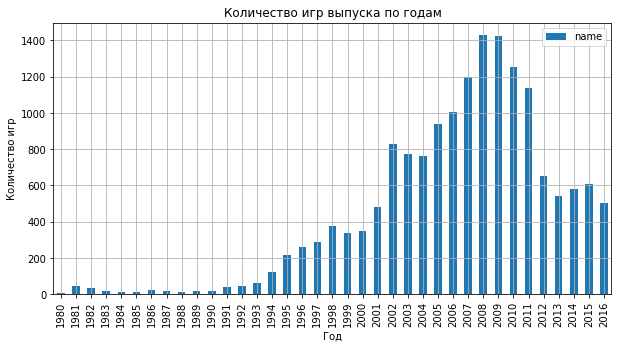

In [22]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar' , grid=True, figsize=(10, 5))

plt.title('Количество игр выпуска по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

С 1991 года замечается рост выпуска игр по 2009 год, самый пик заметен в 2008-2009 год. Данный рост связан с началом и развитием игр. Спад с 2009 по 2016 связан с многими факторами, а именно большая конкурентность, уменьшение колличества игр, но улучшение качества игр, компаниии изменили подход к созданию.

### Продажи по платформам.

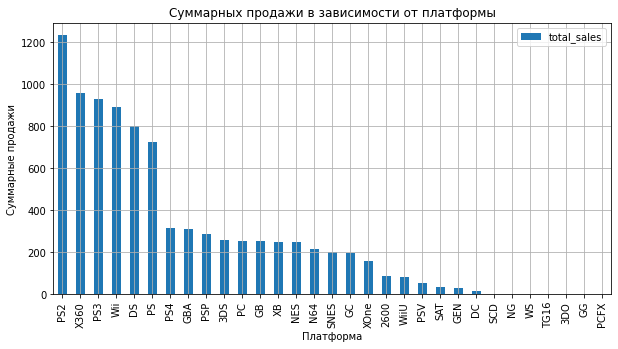

In [23]:
(
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Суммарных продажи в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

По данному результату замечаем максимальные суммарные продажи PS2, X360, PS3, Wii, DS, PS.

In [24]:
max_sale = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
max_sale

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

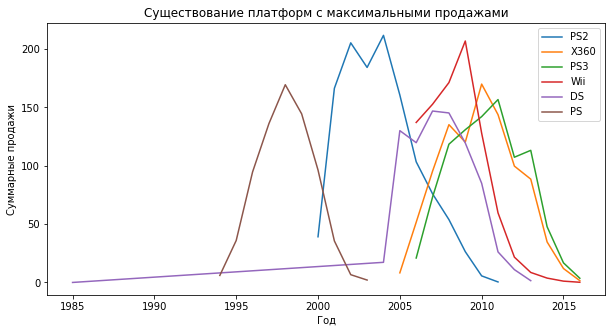

In [25]:
for b in max_sale:
    (
    df.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=b)
    )
    plt.title('Существование платформ с максимальными продажами')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

По данному графику, можно сделать выводы, что каждая платформе в среднем живёт 10 лет, но успех имеют в течении 5 лет, точней пикового значения достигают спустя 5 лет, после происходит спад.

На данный вопрос: За какой характерный срок появляются новые и исчезают старые платформы?

Ответом будет: 10 лет, связанное с прогрессирующем временем.

Для дальнейшей работы по прогнозированию выберу 2011 год, не брав в учёт года ранее.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [27]:
one_year = df[df['year_of_release'] >= 2013]
one_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


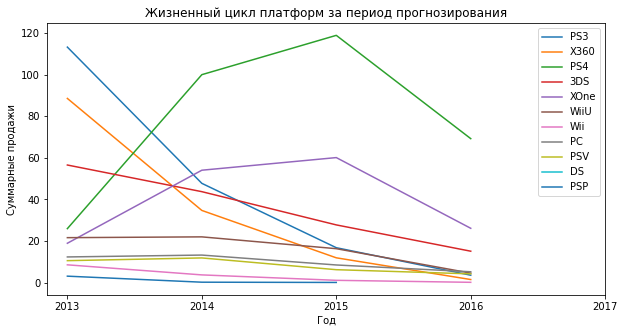

In [28]:
for b in one_year['platform'].unique():
    (
    one_year.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=b)
    )
    plt.title('Жизненный цикл платформ за период прогнозирования')
    plt.xticks(np.arange(2013, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

По данному графику следует, что общая тенденция консолей имеет отрицательный характер, но свежие консоли такие, как PS4 и XOne имели успел не так давно, к сегодня пришли к негативной тендеции. Только эти две платформы имеют шансы на перемены в ближайшие года, ведь фокус идёт именно на них.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [29]:
one_year.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,31.407524,3.048724,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,37.282494,3.963069,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-1.000000,3.500000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.100000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


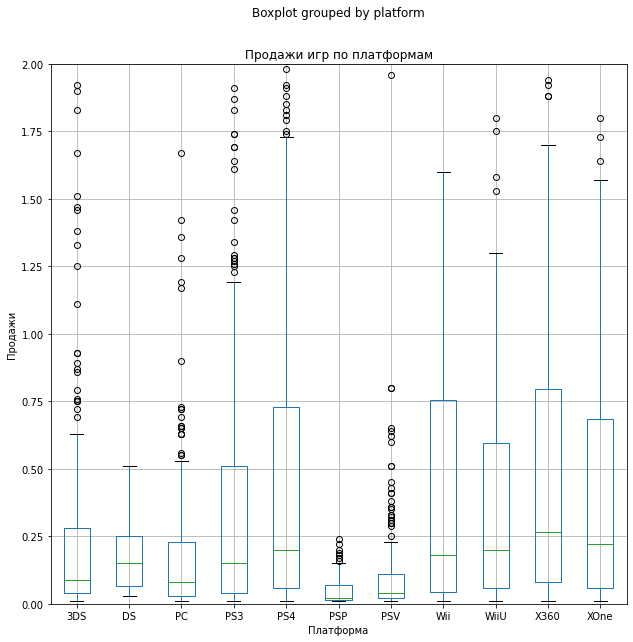

In [30]:
one_year.boxplot(by='platform', column=['total_sales'], figsize=(10,10))
plt.ylim(0,2)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Все платформы имеют выбросы, платформа X360 имеет максимальное значение 3-его квартиля и медианный показатель. Платформы PS4 и XOne имеют близкие значение.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Оценки пользователей и продажи по 5-ти топовым платформам.

In [31]:
one_year_5 = (one_year.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
one_year_5

['PS4', 'PS3', 'XOne', '3DS', 'X360']

Корреляция между оценками пользователей и продажами по платформе PS4  = -0.031957110204556376


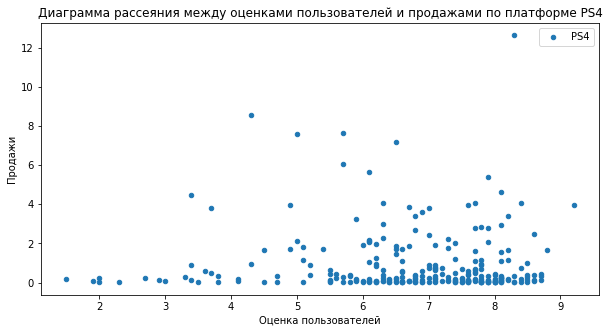

Корреляция между оценками пользователей и продажами по платформе PS3  = 0.0023944027357566925


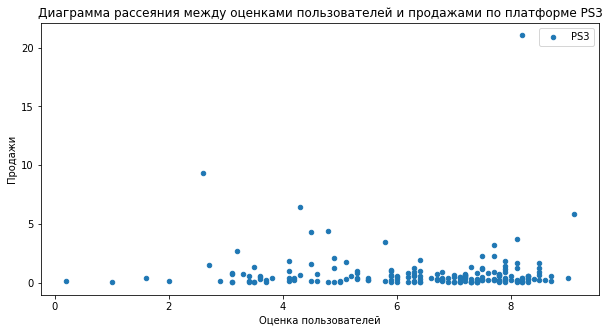

Корреляция между оценками пользователей и продажами по платформе XOne  = -0.06892505328279414


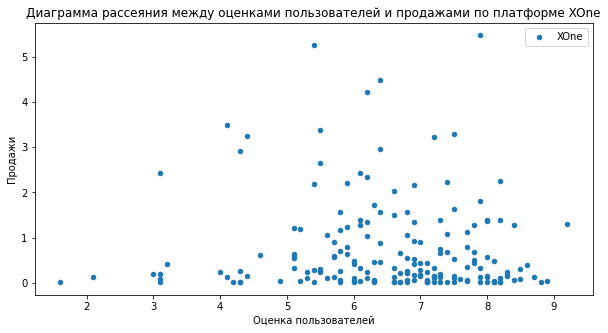

Корреляция между оценками пользователей и продажами по платформе 3DS  = 0.24150411773563016


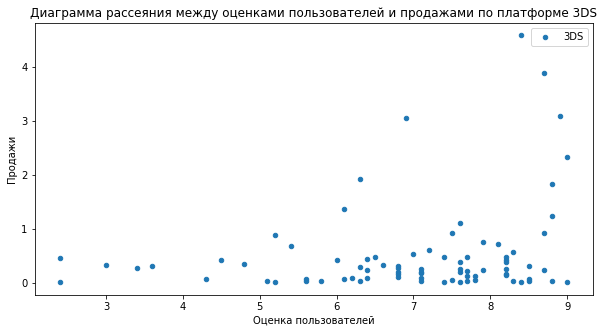

Корреляция между оценками пользователей и продажами по платформе X360  = -0.011742185147181342


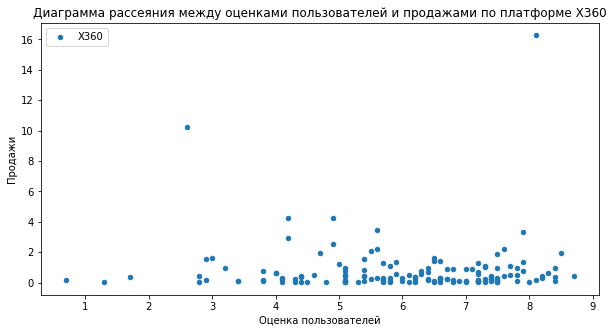

In [32]:
for b in one_year_5:
    (
    one_year.query('platform == @b and user_score > -1')
        .plot(x='user_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Диаграмма рассеяния между оценками пользователей и продажами по платформе {b}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.legend([b])
    print(f'Корреляция между оценками пользователей и продажами по платформе {b}  =', one_year.query('platform == @b and user_score > -1')['user_score'].corr(one_year.query('platform == @b and user_score > -1')['total_sales']))
    plt.show()

По полученным данным, сильная зависимость не прослеживается между оценками пользователей и продажами.

Оценки критиков и продажи по 5-ти топовым платформам.

Корреляция между оценками критиков и продажами по платформе PS4  = 0.40656790206178095


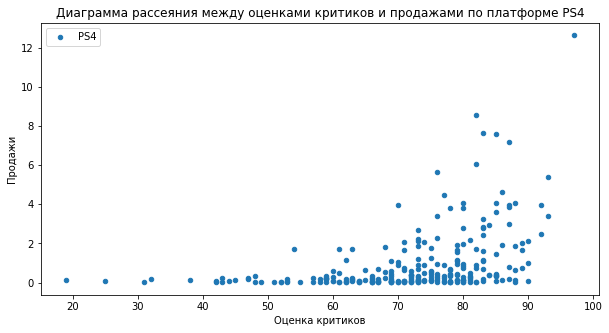

Корреляция между оценками критиков и продажами по платформе PS3  = 0.3342853393371919


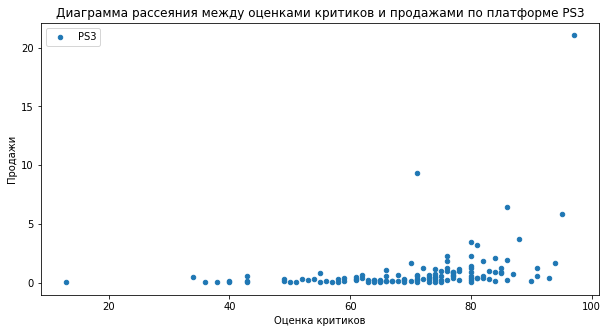

Корреляция между оценками критиков и продажами по платформе XOne  = 0.4169983280084017


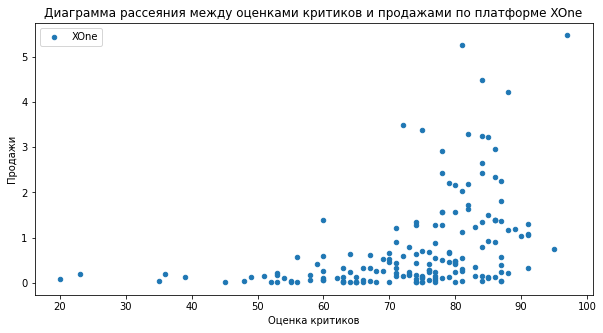

Корреляция между оценками критиков и продажами по платформе 3DS  = 0.3570566142288103


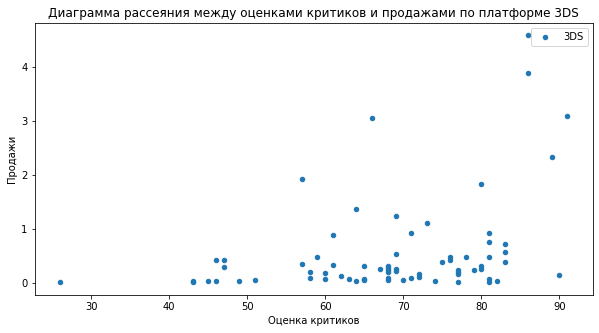

Корреляция между оценками критиков и продажами по платформе X360  = 0.3503445460228664


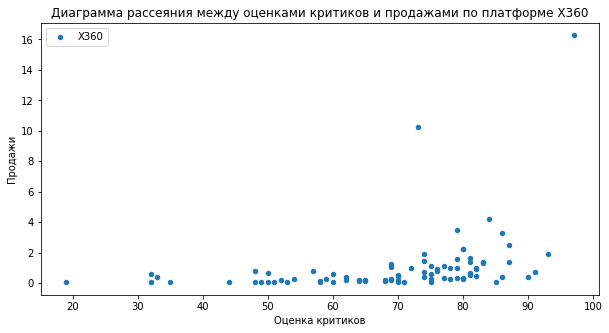

In [33]:
for b in one_year_5:
    (
    one_year.query('platform == @b and critic_score > -1')
        .plot(x='critic_score', 
          y='total_sales', 
          kind='scatter', 
          figsize=(10, 5))
    )
    plt.title(f'Диаграмма рассеяния между оценками критиков и продажами по платформе {b}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.legend([b])
    print(f'Корреляция между оценками критиков и продажами по платформе {b}  =', one_year.query('platform == @b and critic_score > -1')['critic_score'].corr(one_year.query('platform == @b and critic_score > -1')['total_sales']))
    plt.show()

По полученным данным, делаем выводы, что сильной зависимости нет, но оценки критиков учитывают в большей степени, чем оценки пользователей.

Общее сравнение оценок пользователей с продажами.

In [34]:
one_year.query('user_score > -1')['user_score'].corr(one_year['total_sales'])

-0.0026078133545982744

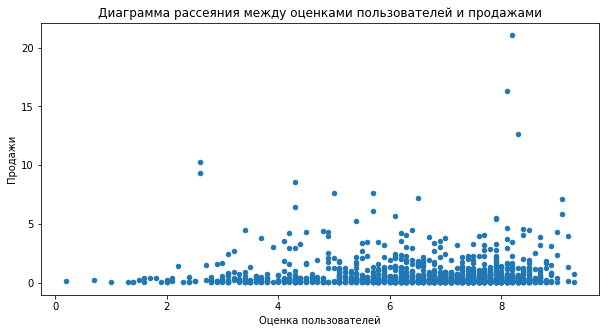

In [35]:
one_year.query('user_score > -1').plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между оценками пользователей и продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

Общее сравнение оценок критиков с продажами.

In [36]:
one_year.query('critic_score > -1')['critic_score'].corr(one_year['total_sales'])

0.3136995151027371

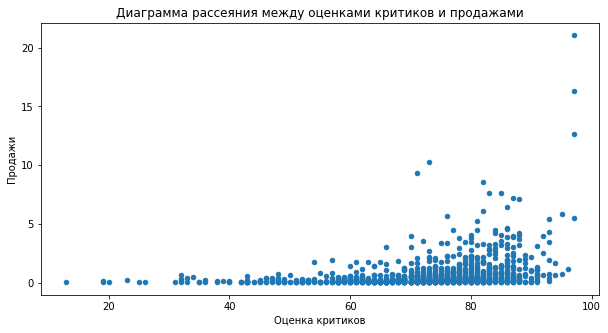

In [37]:
one_year.query('critic_score > -1').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеяния между оценками критиков и продажами')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

В общих показателях делаем вывод, что к мнению критиков прислушиваются больше.

### Соотнесите выводы с продажами игр на других платформах.

<font color='Blue'><b>Выполнил в предыдущем этапе</b></font><br>

У выбранных 5-ти платформ прослеживается слабая зависимость оценок и продажами, но в случае с PS3 и X360, показатель близок к корреляции между оценки критиков и продаж, а PS4 и XOne противоположная картина. 

В общих показателях делаем вывод, что к мнению критиков прислушиваются больше.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

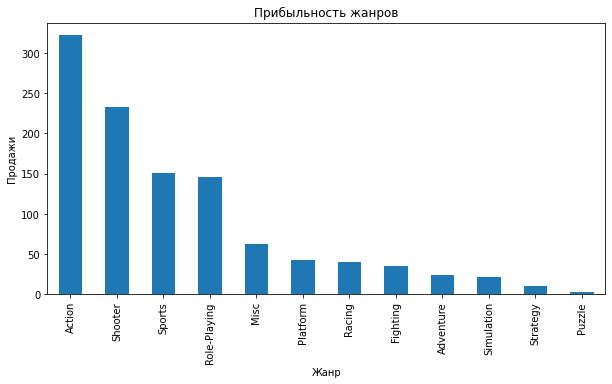

In [38]:
(one_year
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
)
plt.title('Прибыльность жанров')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

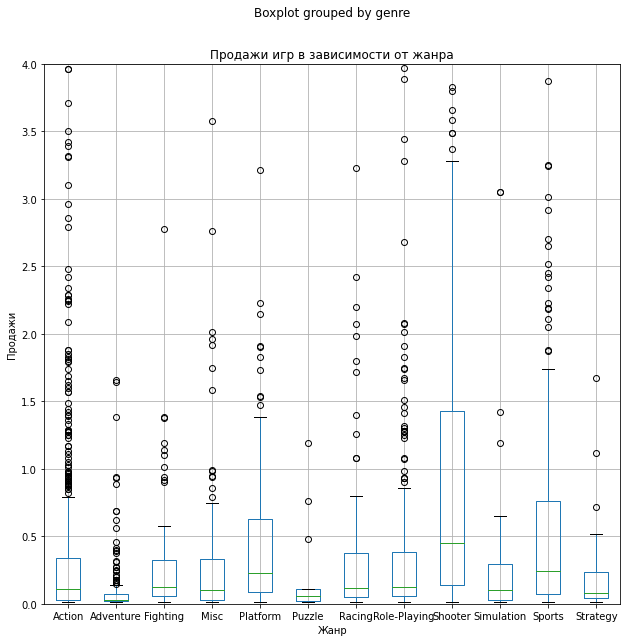

In [39]:
one_year.boxplot(by='genre', column=['total_sales'], figsize=(10,10))
plt.ylim(0,4)
plt.title('Продажи игр в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

In [40]:
one_year.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


За последние 6 лет, в топ- входит такие жанры, как Action, Schooter, а третье место разделает Role Playing и Sports.

Для прогнозирование на ближайшие года следует выделить жанры Shooter и Sports, так как они выглядят более стабильно, чем остальные направления.

### Вывод: По выполнению исследовательского анализа, делаем выводы, что игровая индустрия прогрессирует в умеренной форме, игры живут в течении 10 лет, но имеют пиковые значение всего 5 лет, за последние года платформа PS4 и XOne имели успех, но так же имеют отрицательную тенденцию, продажи слабо зависят от оценок, но к оценкам критиков прислушиваются, наибольший спросс имеют игры с жанром Action, Schooter, а перспективу имеют игры в жанре Shooter и Sports.

## Портрет пользователя каждого региона.

### Определите для пользователя каждого региона (NA, EU, JP). Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [41]:
na = one_year[one_year.year_of_release >= 2013].groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu = one_year[one_year.year_of_release >= 2013].groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp = one_year[one_year.year_of_release >= 2013].groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

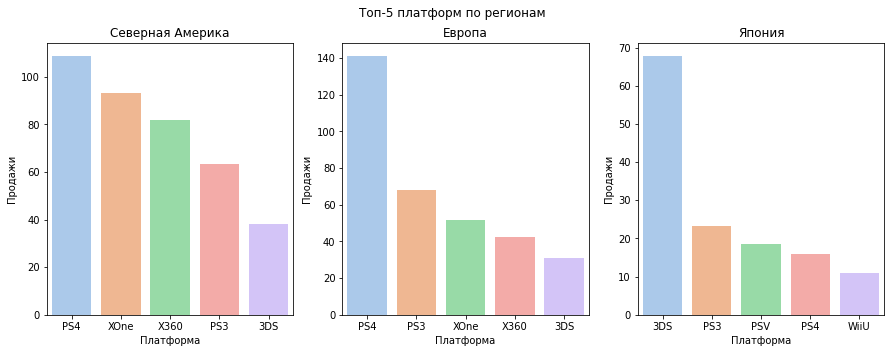

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Топ-5 платформ по регионам')

sns.barplot(y='na_sales', x='platform', data=na, ax=ax[0], palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Платформа')

sns.barplot(y='eu_sales', x='platform', data=eu, ax=ax[1], palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Платформа')

sns.barplot(y='jp_sales', x='platform', data=jp, ax=ax[2], palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Платформа')
plt.show()

В Северной Америке топ-1 занимает платформа X360, Европе - PS4, а в Японии 3DS. Если исследование сделать с 2012 года, то уже в Северной Америке будут изменения, платформа Ps4 займёт первое место, как в Европе.

### Определите для пользователя каждого региона (NA, EU, JP). Самые популярные жанры (топ-5). Поясните разницу.

In [43]:
na_genre = one_year[one_year.year_of_release >= 2013].groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_genre = one_year[one_year.year_of_release >= 2013].groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_genre = one_year[one_year.year_of_release >= 2013].groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

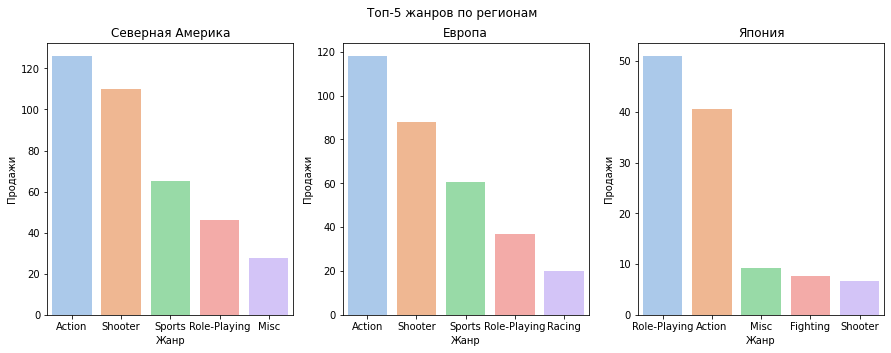

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Топ-5 жанров по регионам')

sns.barplot(y='na_sales', x='genre', data=na_genre, ax=ax[0], palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Жанр')

sns.barplot(y='eu_sales', x='genre', data=eu_genre, ax=ax[1], palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Жанр')

sns.barplot(y='jp_sales', x='genre', data=jp_genre, ax=ax[2], palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Жанр')
plt.show()

<font color='Blue'><b>Я на данный момент плохо дружу с круговыми диаграммами, но я стараюсь исправляться, смотреть видео, читать, учиться. Так красиво, как у тебя не получается.</b></font><br>

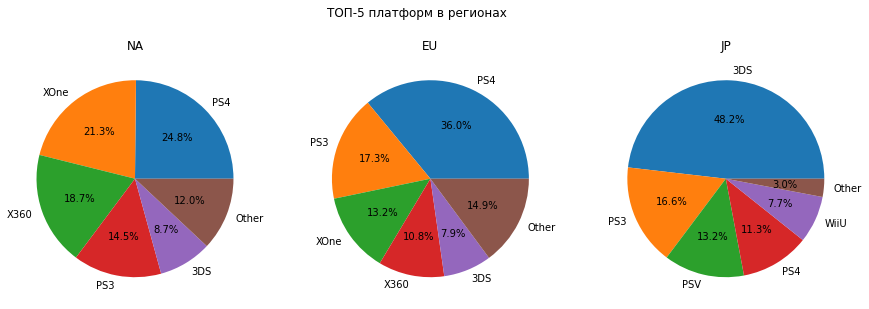

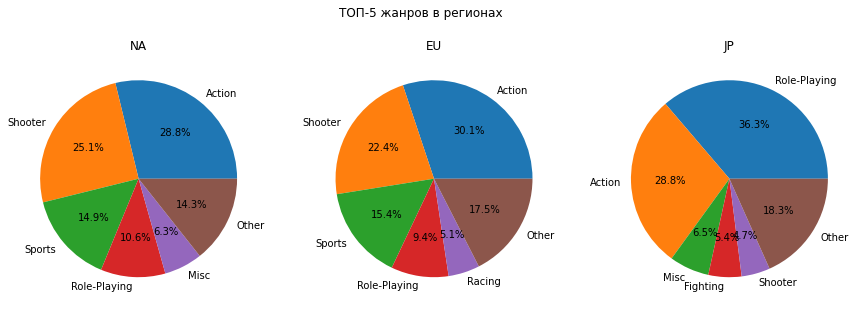

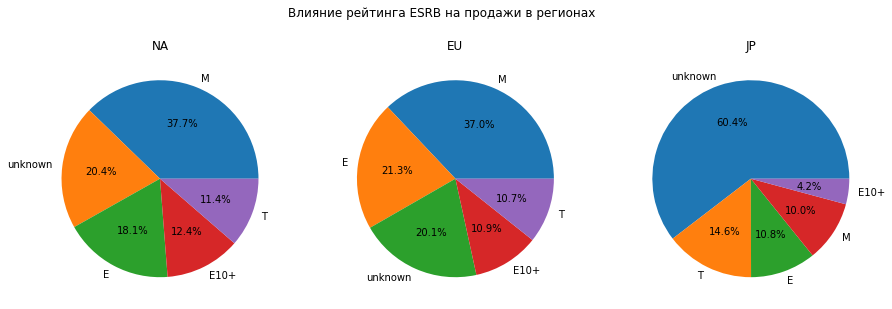

In [56]:
tmp = one_year.copy()               # делаем копию текущего датасета, что бы не работать с исходным    
parametr = 'platform'                     # задаем имя колонки для построения диаграмм

def pie_chart(df, parametr = 'platform'): # в функцию передаем датасет и имя колонки платформ/жанров/рейтинга
    region = df.columns[4:7]              # создаем список регионов из названий колонок
                                          # начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    if parametr == 'platform':            # будем рисовать диаграммы по платформам
        fig.suptitle('ТОП-5 платформ в регионах')
    elif parametr == 'genre':             # будем рисовать диаграммы по жанрам
        fig.suptitle('ТОП-5 жанров в регионах')
    elif parametr == 'rating':            # будем рисовать диаграммы по возрастному рейтингу
        fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
    for r in range(len(region)):
      if parametr != 'rating':            # здесь будет формировать топ-5 и группу "другие"
                                          # выберем 5 самых продающих платформ/жанров
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True)[:5])
                                          # занесем все остальные продажи в другие палатформы/жанры
        df_r = df_r.append({parametr: 'Other', region[r]: df[region[r]].sum() - df_r[region[r]].sum()}, ignore_index= True)
      else:                               # в возрастном рейтинге строим диаграммы по всем значениям
        df_r = (df.groupby(parametr)[region[r]].sum().reset_index().
                sort_values(region[r], ascending = False, ignore_index = True))
        
      axs[r].pie(df_r[region[r]], labels = df_r[parametr], autopct='%1.1f%%')
                                          # зададим название региона.
      axs[r].set_title(df_r.columns[1].split('_')[0].upper())
    plt.show()
    
pie_chart(tmp, parametr)                  # выводим диаграмму
pie_chart(tmp, 'genre')
pie_chart(tmp, 'rating')

В Северной Америке и в Европе популярность имеют игры жанра Action, на втором месте Shooter, на третьем Sports.

В Японии иная картина,на первом месте находится - жанр Role-Playing, Action на втором, а жанр Shooter - совсем не присутсвует в топ-5.

### Определите для пользователя каждого региона (NA, EU, JP). Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [45]:
na_rating = one_year[one_year.year_of_release >= 2013].groupby('rating')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_rating = one_year[one_year.year_of_release >= 2013].groupby('rating')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_rating = one_year[one_year.year_of_release >= 2013].groupby('rating')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

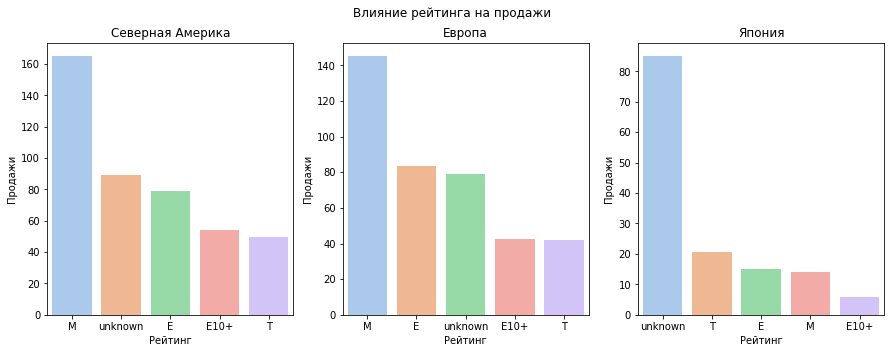

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга на продажи')

sns.barplot(y='na_sales', x='rating', data=na_rating, ax=ax[0], palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Рейтинг')

sns.barplot(y='eu_sales', x='rating', data=eu_rating, ax=ax[1], palette='pastel')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Рейтинг')

sns.barplot(y='jp_sales', x='rating', data=jp_rating, ax=ax[2], palette='pastel')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Рейтинг')
plt.show()

Разница влияния рейтинга на продажи прослеживается только между западом и востоком, если в Северной Америке и Европе топ занимает категория М и Е, тогда в Японии Е и Т, в Японии большой показатель неопределенном рейтинге.

### Вывод: Портрет пользователя Северной Америки и Европы совпадают, выбирают платформы PS3, PS4, X360, жанры Action, Schooter, Sports и в категории М и Е. Но в Японии портрет отличается, пользователи выбирают 3DS, жанр Role-Playing, Action в категории Е и Т, но с  большим колличеством неопределенного рейтингом.

## Проверьте гипотезы.

 ### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [47]:
xone = one_year.query('platform == "XOne" and user_score > -1')
xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [48]:
pc = one_year.query("platform == 'PC' and user_score > -1")
pc['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Гипотезы

Н0: Средние пользовательские рейтинги платформ XOne и PC равны

Н1: Средние пользовательские рейтинги платформ XOne и PC не равны

In [49]:
alpha = 0.05

results = st.ttest_ind(xone['user_score'], pc['user_score'],equal_var=False,alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, следовательно, можно предположить, что XOne и  PC равны,  при alpha=0.05

### Средние пользовательские рейтинги жанров Action и Sports разные.

In [50]:
action = one_year.query('genre == "Action" and user_score > -1')
action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [51]:
sports = one_year.query("genre == 'Sports' and user_score > -1")
sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Гипотезы

Заранее перевернём ситуацию, следовательно, если мы отвергнем нулевую гипотезу, Action и Sports не равны

Н0: Средние пользовательские рейтинги жанров Action и Sports равны

Н1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [52]:
alpha = 0.05

results = st.ttest_ind(action['user_score'], sports['user_score'],equal_var=False,alternative='two-sided')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно, есть основания предположить, что Action и Sports не равны, при alpha=0.05

### Поясните: Как вы сформулировали нулевую и альтернативную гипотезы.

В первом случае, задание удовлетворяет условия для составления нулевой гипотезы, то есть сравнимаемые величины равны. 

Альтернативная гипотеза может быть проверена тремя вариантами "меньше", "не равно", "больше" в первом необходимо проверить вопрос про равенство, следовательно проверку надо провести двухстороннюю alternative='two-sided'.

Во втором случае, задание не удовлетворяет условия для составления нулевой гипотезы(сравнимаемые параметры равны), то есть сравнимаемые величины не равны. Для решения мы перевернули условия, а именно, если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные.

Альтернативная гипотеза может быть проверена тремя вариантами "меньше", "не равно", "больше" в первом необходимо проверить вопрос про равенство, следовательно проверку надо провести двухстороннюю alternative='two-sided'.

### Поясните: Какой критерий применили для проверки гипотез и почему.

Если значений в выборке много больше 30, то распределение Стьюдента настолько близко к нормальному, что можно было бы просто взять нормальное распределение без степеней свободы.

Но чтобы не усложнять себе жизнь выбором нужного теста, принято просто каждый раз применять t-тест — ведь он работает для выборки любого размера.

Для проверки гипотезы необходимо установить уровень значимости для того или иного сравнения, обычно его выбирают из размерного ряда 1-10 %, в зависимости от изученности и требовательности к данным. Обычно его устанавливают в среднем значении 0,05.

## Общий вывод:

В данной работе было выполнено, для достижения поставленной задачи, 5 шагов:

Шаг 1. Открытие файла с данными и изучение общей ифнормации.

В данном датафрейме всего 16715 строк, имеются пропуски, дубликаты, нарушение в типизации данных и названия колонок имеют лексическую ошибку.

Шаг 2. Предобработка данных.

Все замечания в данных были устранены: убедились в отсутствии дубликатов, избавились от пропусков, изменили тип данных, привели названия столбцов к правильному виду и посчитали суммарные продажи во всех регионах. Проведён поиск по пропущенным значениям 'tbd'(оценки для Северной Америки) и пропуску в столбце rating и провели обработку. В исключительных местах пропуски заменили на -1, чтобы не исказить статистику.

Шаг 3. Исследовательский анализ данных.

По выполнению исследовательского анализа, делаем выводы, что игровая индустрия прогрессирует в умеренной форме, игры живут в течении 7 лет, но имеют пиковые значение всего 5 лет, за последние года платформа PS4 и XOne имели успех, но так же имеют отрицательную тенденцию, продажи слабо зависят от оценок, но к оценкам критиков прислушиваются, наибольший спросс имеют игры с жанром Action, Schooter, а перспективу имеют игры в жанре Shooter и Sports.

Шаг 4. Портрет пользователя каждого региона.

Портрет пользователя Северной Америки и Европы совпадают, выбирают платформы PS3, PS4, X360, жанры Action, Schooter, Sports и в категории М и Е. Но в Японии портрет отличается, пользователи выбирают 3DS, жанр Role-Playing, Action в категории Е и Т, но с большим количеством неопределенного рейтинга.

Шаг 5. Проверьте гипотезы

Нулевая гипотеза не отвергнута, следовательно, XOne и PC равны.
Нулевая гипотеза отвергнута, следовательно, Action и Sports не равны.

Потенциально популярный продукт и рекламные кампании должны быть направлены на платформы PS3, PS4, XOne. Игры жанра Action, Schooter, Sports для запада. Игры жанра Role-Playing, Action для востока. В категории М, Е, Т, но учитывая не только их.

</font><font color='Blue'><b>Рекламный бюджет стоит потратить на платформы PS4 и XOne, жанры Action, Schooter, для категории М, Е, Т.</b></font><br>

</font><font color='Blue'><b>Жанр Sports не требует рекламы, так как спортивные собития коссвенно рекламируют игры. Например FIFA.</b></font><br>